#AUTHOR : Jyotsna
##GRIP @ The Sparks Foundation GRIPJANUARY2022 (Data Science & Business Analytics)
##Technical TASK 2 :- Prediction using Unsupervised ML
###To predict the optimum no. of clusters from the given 'Iris' dataset and represent visually.

#Importing Libraries

In [313]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Reading the data from online source

In [314]:
# Reading data from remote link
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQPinANAUnj2ztuT6vS8fLW0gEnuTw4Acsuao3hyT9XBMdoFjezBv2LttwcorP9bvREg-VcwhIZY_hS/pub?gid=180061103&single=true&output=csv') #published the data online for reference
print('Data Import Successful')
print(data.shape)
data

Data Import Successful
(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Data Exploration

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [316]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [317]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [318]:
#droping columns that are not needed
df = data.drop('Id',axis=1,inplace=True)
df = data.drop(columns='Species')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###Before clustering the data using kmeans, we need to specify the number of clusters.

#Using the elbow method to find the optmimal number of clusters

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [319]:
# Calculating the within-cluster sum of square (wcss)
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10): 
    km=KMeans(n_clusters=i)#init='k-means++',random_state=0) 
    km.fit(df)
    wcss.append(km.inertia_)

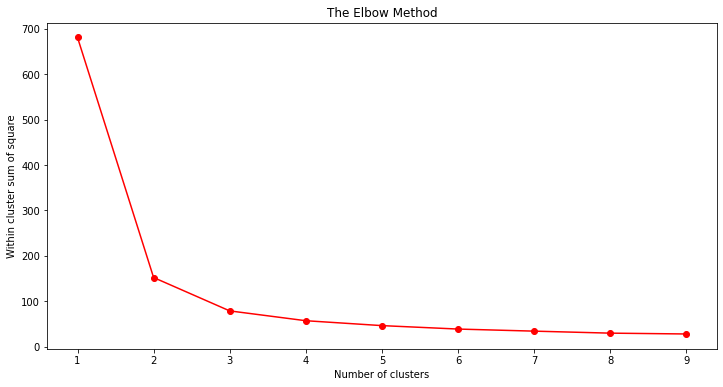

In [320]:
# Plotting the "within-cluster sum of square" against clusters range
plt.figure(figsize=(12,6))
plt.plot(range(1,10), wcss, marker='o' ,color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of square')
plt.show()

From the above graph, we can see that the global minima occurs at k=3.

#Training the KMeans model on the dataset

In [321]:
km= KMeans(n_clusters=3 , init='k-means++')
y_kmeans= km.fit_predict(df)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [325]:
df['cluster']=y_kmeans
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [323]:
km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#Visualising the clusters

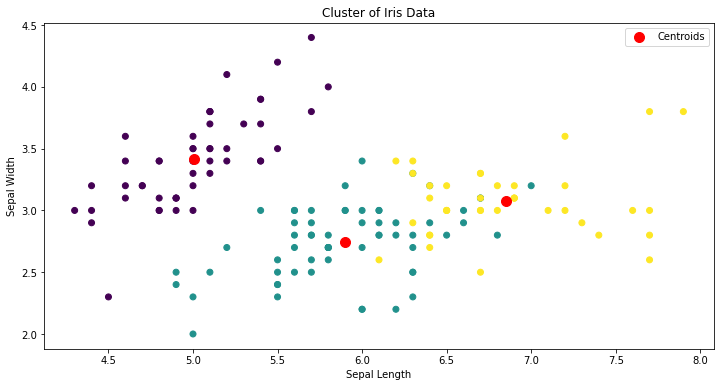

In [359]:
plt.figure(figsize=(12,6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df.cluster)

# Plotting the cluster centers
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter( km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100,c = 'red', label = 'Centroids')
plt.legend()
plt.show()

***Hence, the k-means clusters of the given dataset has been plotted. The optimum number of clusters is found to be 3.***